**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Ella Primeau<br/>
Student Number: 300168875

# Exploratory Analysis

## Import important libraries

In [ ]:
# Your code goes here

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [ ]:
url = # provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

dataset = pd.read_csv(url)

## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

***
# Student Response
### 1.1 The following datasets have missing values:
- 16P.csv - None
- dermatology_database_1.csv - None
- glass.csv - None
- Maternal Health Risk Data Set.csv - None
- test.csv - 23,541 - Attributes: Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance
- train.csv - 46951 - Attributes: Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance
- WineQT.csv - None

### 1.2
The analysis was done primarily using the pandas.isnull() function to highlight missing values and list in which attributes they appear

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ellaprimeau/CSI4106-a1/refs/heads/master/test.csv'
data = pd.read_csv(url, encoding='latin1')
print(data.isnull().any())
print(data[data.isnull().any(axis=1)])

The first print command creates and outputs a dataframe of every row with missing values, while the second gives a boolean list of the attributes, wherein attributes with missing values will give 'true'
***

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?


3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

***
# Student Response
### 2.1
I have chosen the wine quality dataset. This dataset is designed to predict the quality of red wines based on chemical levels and pH. I do not have any expertise in the domain of this application.

### 3.1 
I believe all the attributes are relevant, since they all have to do with the chemical levels of the wine which would impact the quality in unanticipated ways

### 3.2 Generation of Histogram

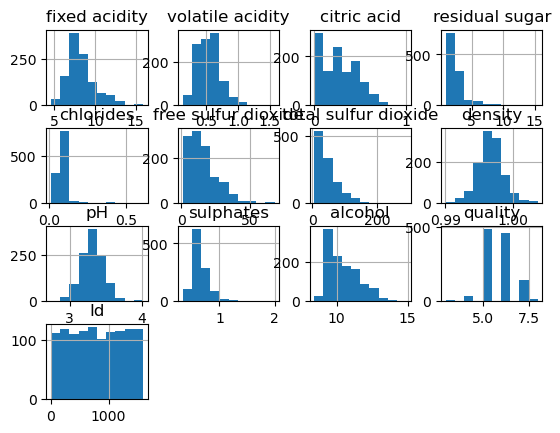

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/ellaprimeau/CSI4106-a1/refs/heads/master/WineQT.csv'
data = pd.read_csv(url, encoding='latin1')

hist = data.hist()
plt.show()

As can be seen, much of this dataset is unbalanced. The attributes `fixed acidity`, `volatile aciditiy`, `density`, and `pH` have somewhat regular bell curves, but the rest of the data is far more disorganized. `chlorides` for example has a very tight distribution, making it potentially difficult for the model to anticipate how this attribute will affect results. Additionally, `quality` has a similar problem, where almost all entries fit into 3 columns. It will be a challenge to work around these inconsistent attributes
***

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

***
# Student Response
### 4.

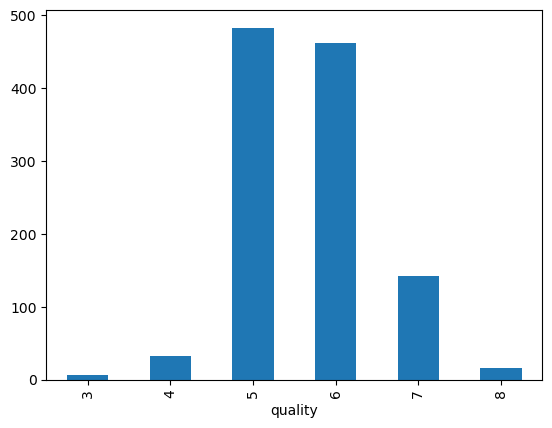

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/ellaprimeau/CSI4106-a1/refs/heads/master/WineQT.csv'
data = pd.read_csv(url, encoding='latin1')

data.groupby("quality").size().plot(kind='bar')
plt.show()

As noted earlier, a very high percentage of the wine was ranked quality 5 or 6. While this is close to a bell curve, for proper data analysis we would want a much wider bell, i.e. a larger amount of wines that were ranked <5 or >7. This data will be able to predict what will make an average wine with some success, but likely won't be able to predict what makes an excellent or poor quality wine.
***

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

***
# Student Response
### 5.1
Many of the attributes in this dataset have distributions that are very similar to a chi-squared distribution, which typically is close to gaussian after a quantile transform. Using this on one of the less distributed attributes, `chlorides`, we can see this dramatically improves the distribution:

### Before

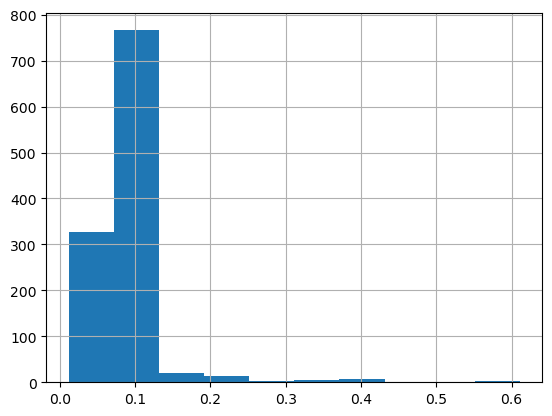

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/ellaprimeau/CSI4106-a1/refs/heads/master/WineQT.csv'
data = pd.read_csv(url, encoding='latin1')

data['chlorides'].hist()
plt.show()

### After

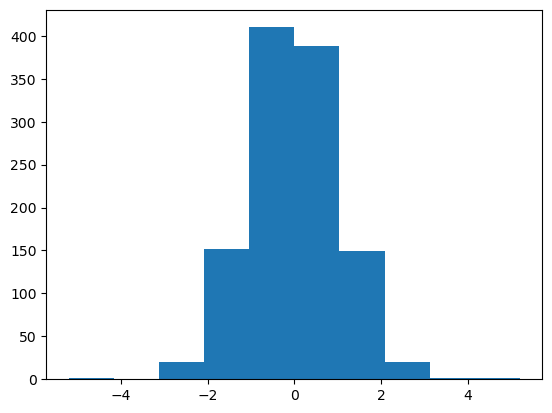

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/ellaprimeau/CSI4106-a1/refs/heads/master/WineQT.csv'
data = pd.read_csv(url, encoding='latin1')

plt.hist(preprocessing.quantile_transform(data[['chlorides']], output_distribution="normal"))
plt.show()

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [ ]:
# Your code goes here

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [ ]:
# Your code goes here

--------------------------------------------------------------------------

# References

- https://scikit-learn.org/stable/modules/preprocessing.html

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".